## Project "Term Deposit Sale"

## Goal
Using the data collected from existing customers, build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio.

#### Attribute information
Input variables:<br><br>
Bank client data:<br>
1. age: Continuous feature<br>
2. job: Type of job (management, technician, entrepreneur, blue-collar, etc.)<br>
3. marital: marital status (married, single, divorced)<br>
4. education: education level (primary, secondary, tertiary)<br>
5. default: has credit in default?<br>
6. housing: has housing loan?<br>
7. loan: has personal loan?<br>
8. balance in account<br>

Related to previous contact:<br>
9. contact: contact communication type<br>
10. month: last contact month of year<br>
11. day: last contact day of the month<br>
12. duration: last contact duration, in seconds<br>

Other attributes:<br>
13. campaign: number of contacts performed during this campaign and for this client<br>
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (-1 tells us the person has not been contacted or contact period is beyond 900 days)<br>
15. previous: number of times the client has been contacted before for the last campaign to subscribe term deposit<br>
16. poutcome: outcome of the previous marketing campaign<br>

Output variable (desired target):<br>
17. Target: Tell us has the client subscribed a term deposit. (Yes, No)

## Import all necessary modules and load the data

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

# Models and Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

# Metrics and scores
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score

#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

from yellowbrick.classifier import ClassificationReport, ROCAUC

from IPython.display import Image  
from sklearn import tree
from os import system

# Standardization, or mean removal and variance scaling ( https://scikit-learn.org/stable/modules/preprocessing.html )
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.model_selection import GridSearchCV

/Users/koki/opt/anaconda3/envs/python0306/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
df = pd.read_csv("bank-full.csv")

In [3]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [4]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


### Shape

In [5]:
df.shape

(45211, 17)

### Check for null values

In [6]:
df.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
Target       False
dtype: bool

##### <i>[Note] There is no null data

## Print the descriptive statistics of each & every column using describe() function

#### Data types

In [7]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

#### Description of the independent attributes

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


#### Attribute information
##### Input variables:
##### Bank client data:
1. age: Continuous feature<br>
2. job: Type of job (management, technician, entrepreneur, blue-collar, etc.)<br>
3. marital: marital status (married, single, divorced)<br>
4. education: education level (primary, secondary, tertiary)<br>
5. default: has credit in default?<br>
6. housing: has housing loan?<br>
7. loan: has personal loan?<br>
8. balance in account<br>

##### Related to previous contact:
9. contact: contact communication type<br>
10. month: last contact month of year<br>
11. day: last contact day of the month<br>
12. duration: last contact duration, in seconds<br>

##### Other attributes:
13. campaign: number of contacts performed during this campaign and for this client<br>
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (-1 tells us the person has not been contacted or contact period is beyond 900 days)<br>
15. previous: number of times the client has been contacted before for the last campaign to subscribe term deposit<br>
16. poutcome: outcome of the previous marketing campaign<br>

##### Output variable (desired target):
17. Target: Tell us has the client subscribed a term deposit. (Yes, No)<br>
<br>

In [9]:
attributes = {
    "age": "Continuous feature",
    "job": "Type of job (management, technician, entrepreneur, blue-collar, etc.)",
    "marital": "marital status (married, single, divorced)",
    "education": "education level (primary, secondary, tertiary)",
    "default": "has credit in default?",
    "housing": "has housing loan?",
    "loan": "has personal loan?",
    "balance": "balance in account",
    "contact": "contact communication type",
    "month": "last contact month of year",
    "day": "last contact day of the month",
    "duration": "last contact duration, in seconds",
    "campaign": "number of contacts performed during this campaign and for this client",
    "pdays": "number of days that passed by after the client was last contacted from a previous campaign (-1 tells us the person has not been contacted or contact period is beyond 900 days)",
    "previous": "number of times the client has been contacted before for the last campaign to subscribe term deposit",
    "poutcome": "outcome of the previous marketing campaign",
    "Target": "Tell us has the client subscribed a term deposit. (Yes, No)"
             }

##### Number of unique values in a column

In [10]:
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

##### Skewness

In [11]:
df.skew().sort_values(ascending=False)

previous    41.846454
balance      8.360308
campaign     4.898650
duration     3.144318
pdays        2.615715
age          0.684818
day          0.093079
dtype: float64

##### Kurtosis

In [12]:
df.kurt().sort_values(ascending=False)

previous    4506.860660
balance      140.751547
campaign      39.249651
duration      18.153915
pdays          6.935195
age            0.319570
day           -1.059897
dtype: float64

##### <i>[Insights]
##### <i> More than half of attributes are categorical variables.
##### <i> "balance" and "pdays" have negative value.
##### <i> "previous" and "balance" have higher skewness and kurtosis.

In [13]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

#### Displot for int

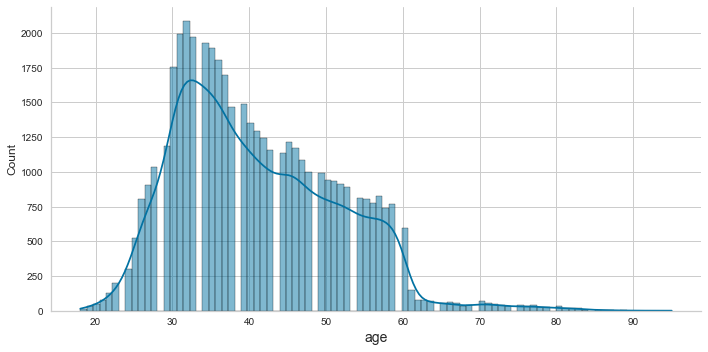

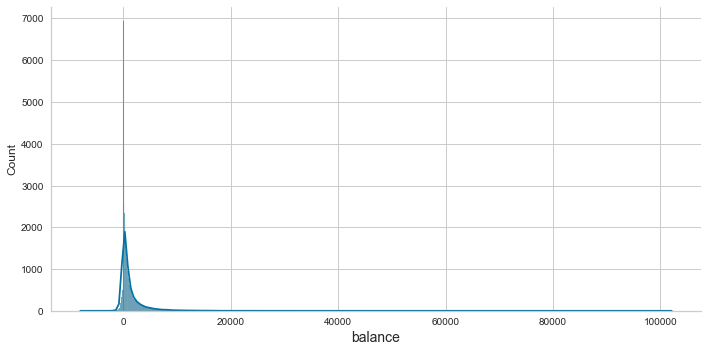

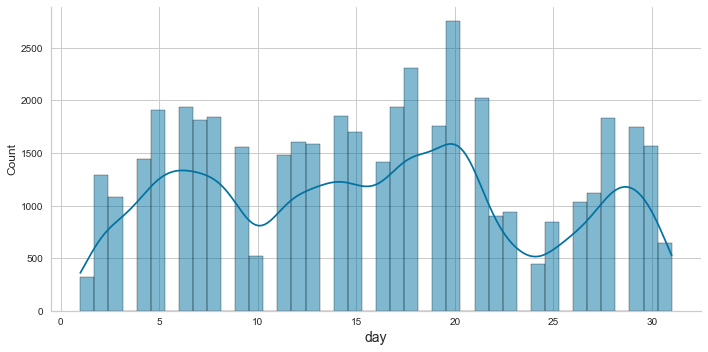

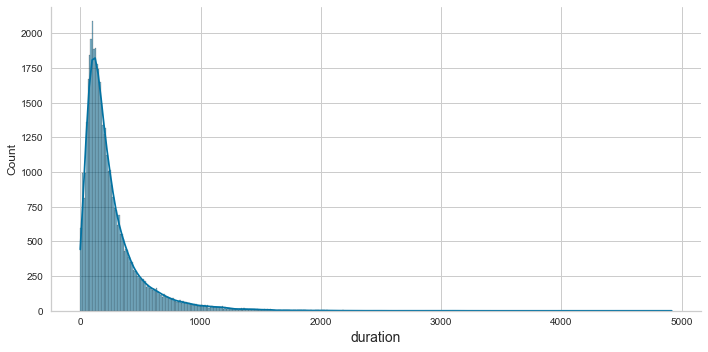

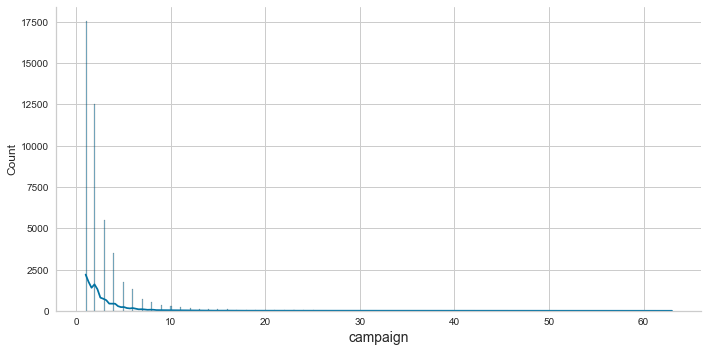

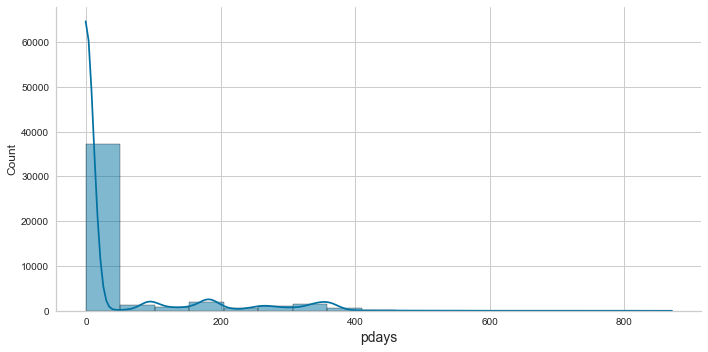

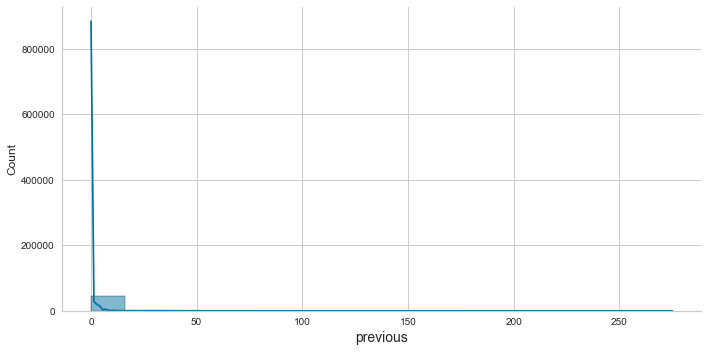

In [14]:
for col in df.columns:
    if df[col].dtypes == int:
        sns.displot(df[col], kde=True, height=5, aspect=2)
        plt.xlabel(col, fontsize=14)
        plt.ylabel("Count", fontsize=12)
        plt.show()

##### <i>[Insights]
##### <i> "balance", "duration", "campaign", "pdays", and "previous" are right skewed.

#### Boxplot for int

In [15]:
sns.boxplot

<function seaborn.categorical.boxplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, ax=None, **kwargs)>

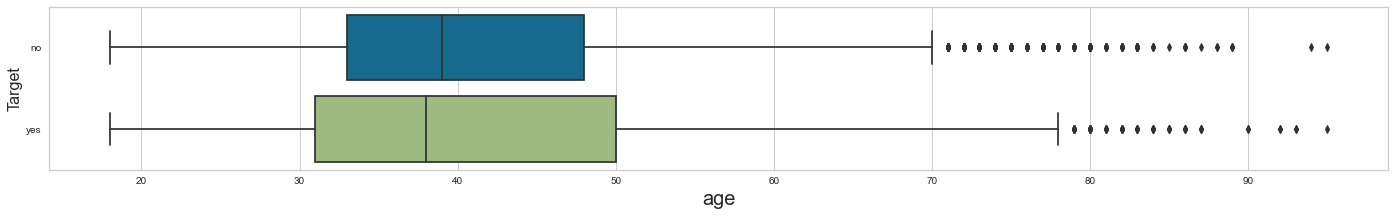

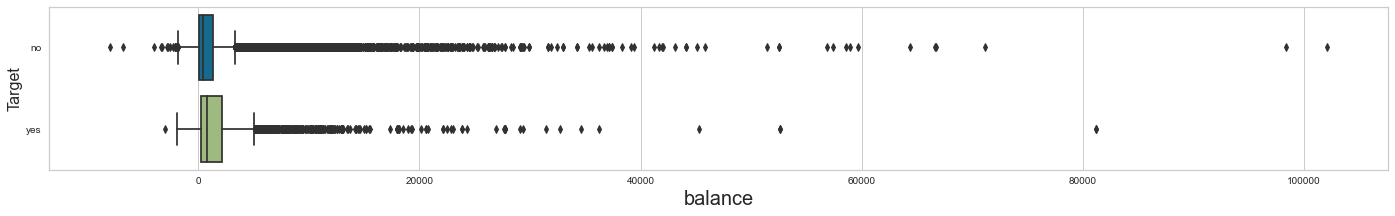

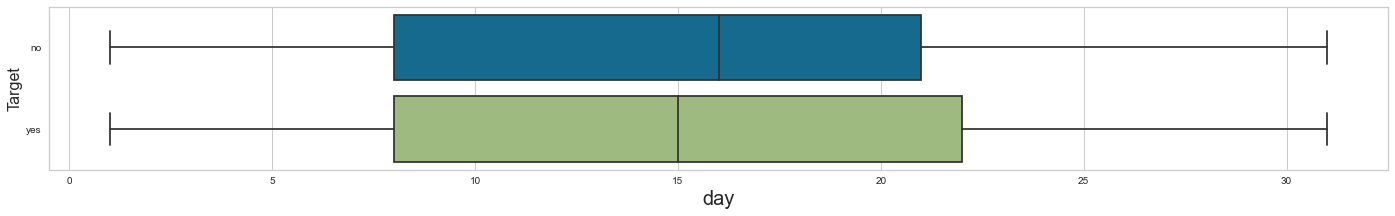

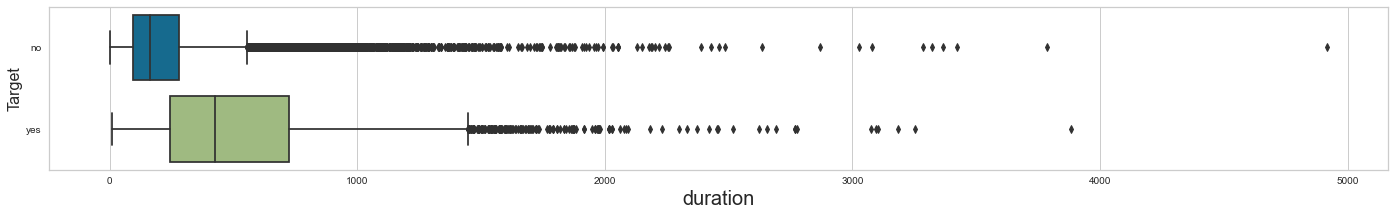

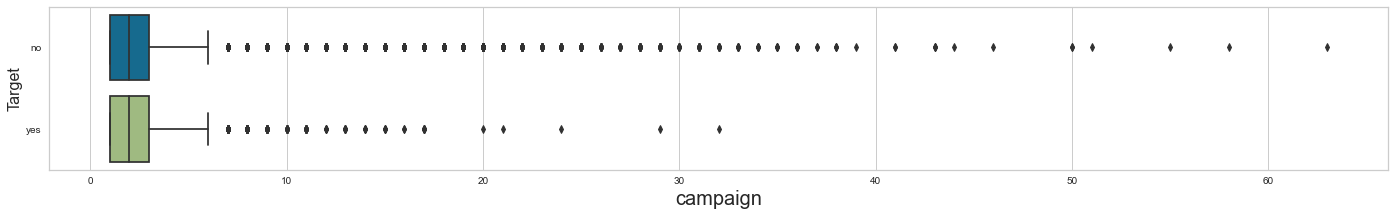

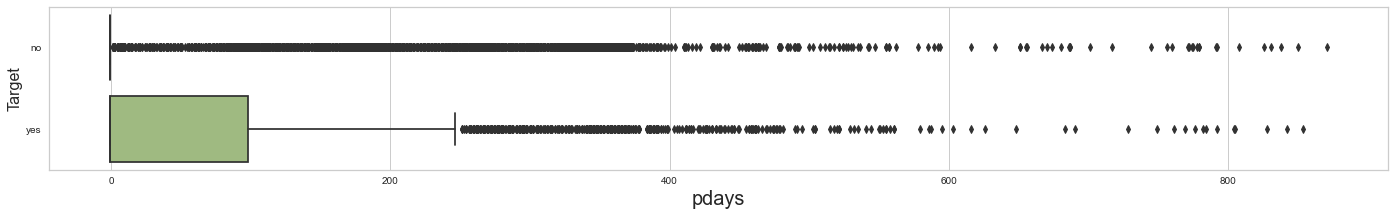

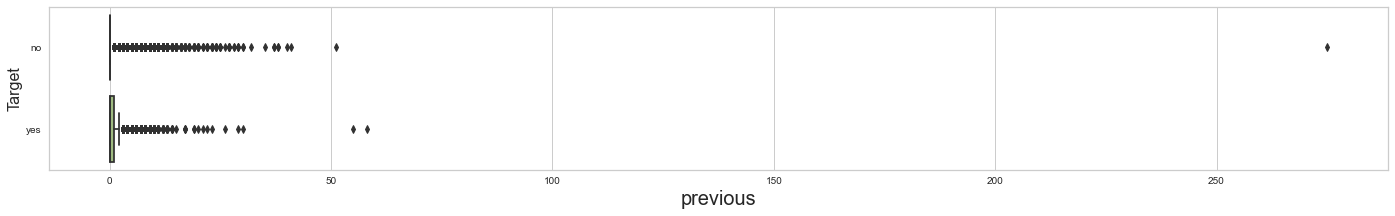

In [16]:
for i in df.columns:
    if df[i].dtypes == int:
        plt.figure(figsize=(24,3))
        sns.boxplot(x=i, y='Target', data=df)
        plt.xlabel(i ,fontsize=20)
        plt.ylabel('Target', fontsize=16)
        plt.show()
        print()

##### <i>[Insights]
##### <i> Many outliers in "age", "balance", "duration", "campaign", "pdays", and "previous".
##### <i> ("balance", "duration" "pdays", and "previous" are especially high).

#### pdays

In [17]:
df[df['pdays']<0]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes


##### <i>[Definition of pdays]:<br>
<i>pdays: number of days that passed by after the client was last contacted from a previous campaign<br>
<i>       (-1 tells us the person has not been contacted or contact period is beyond 900 days)
        

##### <i>[Insights]
##### <i>According to the definition, negative pdays doesn't mean pdays is small. It actually means, pdays is really big (over 900) or not applicable.

In [18]:
df[(df['pdays']<0) & (df['Target']=='yes')]['Target'].count()

3384

In [19]:
df[(df['pdays']<0) & (df['Target']=='no')]['Target'].count()

33570

In [20]:
df[(df['pdays']>0) & (df['Target']=='yes')]['Target'].count()

1905

In [21]:
df[(df['pdays']>0) & (df['Target']=='no')]['Target'].count()

6352

In [22]:
df[(df['pdays']==0)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target


##### <i>[Note]
##### <i>If pdays<0, more than 90% (33570 / (3384+33570)) of the result(Target) is "no".
##### <i>If pdays>0, around 77% (6352 / (1905+6352)) of the result(Target) is "no".
##### <i>Considering the definition of pdays that pdays -1 means it is over 900 or no concact. Since no contact has similar meaning with contacted long time ago, I'll replace pdays=-1 with 900. This may not accurate replacement but it deem reasonable to say that this is better than having pdays as -1.
##### <i>I prepared two python codes, one with replacement and one without replacement. Since, the file with replacement got better performance in the best f1 score model, I'll keep this file with replacement.

#### Convert negative pdays to 0, positive pdays to 1.

In [23]:
df[df['pdays']<0]['pdays']

0       -1
1       -1
2       -1
3       -1
4       -1
        ..
45203   -1
45205   -1
45206   -1
45207   -1
45209   -1
Name: pdays, Length: 36954, dtype: int64

In [24]:
df['pdays'][df['pdays']<0] = 900

/Users/koki/opt/anaconda3/envs/python0306/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
df[df['pdays']<0]['pdays']

Series([], Name: pdays, dtype: int64)

In [26]:
df[df['pdays']>0]['pdays']

0        900
1        900
2        900
3        900
4        900
        ... 
45206    900
45207    900
45208    184
45209    900
45210    188
Name: pdays, Length: 45211, dtype: int64

In [27]:
#df['pdays'][df['pdays']>0] = 1

In [28]:
df[df['pdays']>0]['pdays']

0        900
1        900
2        900
3        900
4        900
        ... 
45206    900
45207    900
45208    184
45209    900
45210    188
Name: pdays, Length: 45211, dtype: int64

In [29]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,900,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,900,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,900,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,900,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,900,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,900,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,900,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,900,0,unknown,no


#### Countplot for object

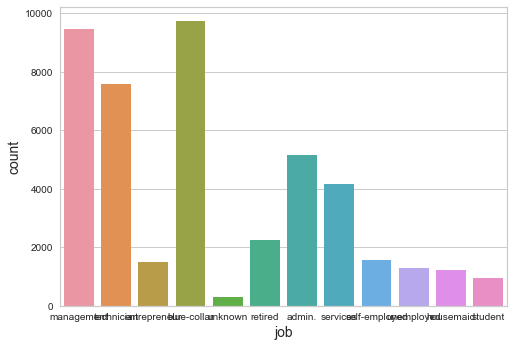

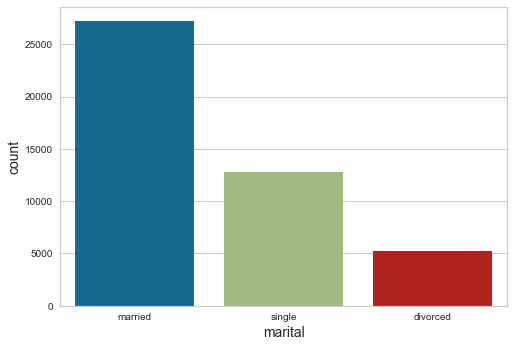

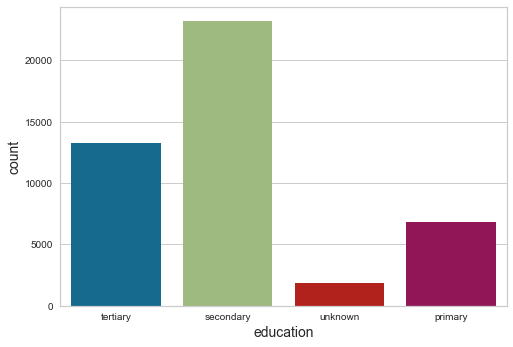

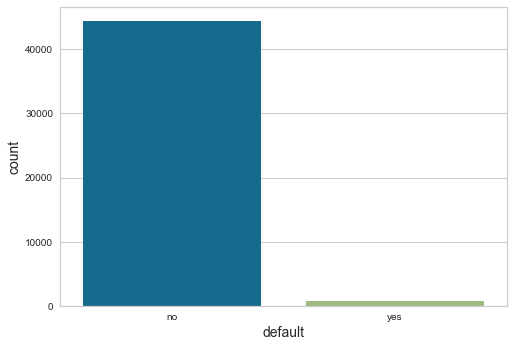

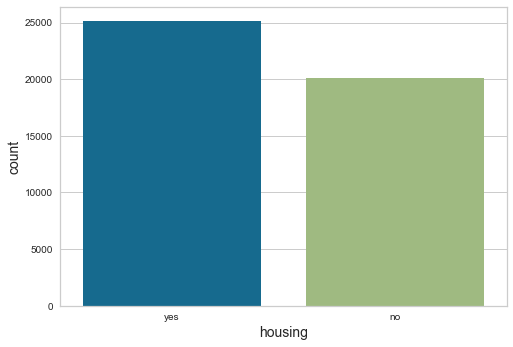

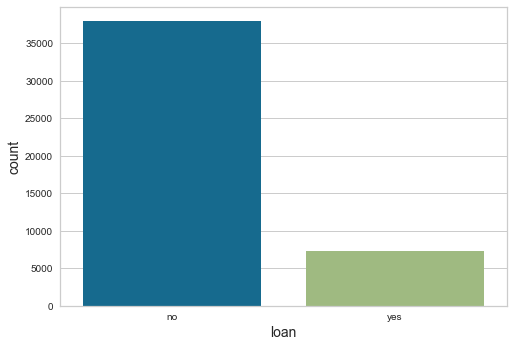

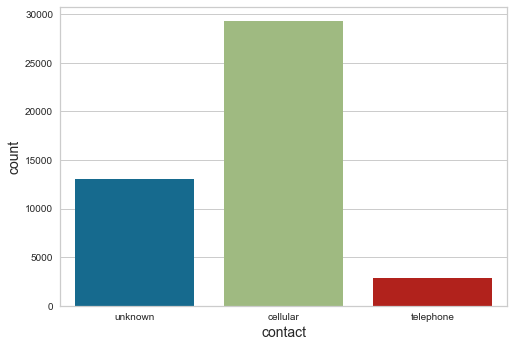

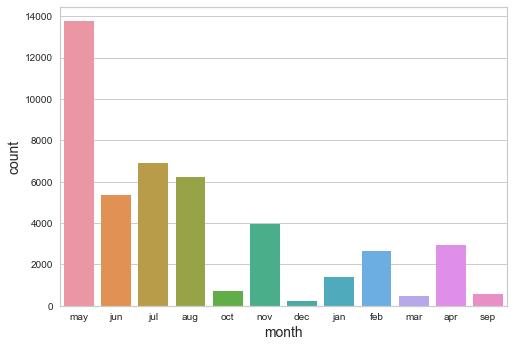

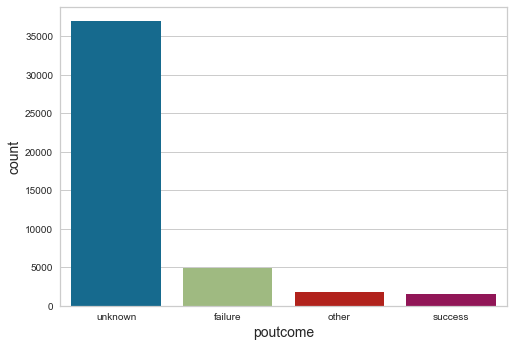

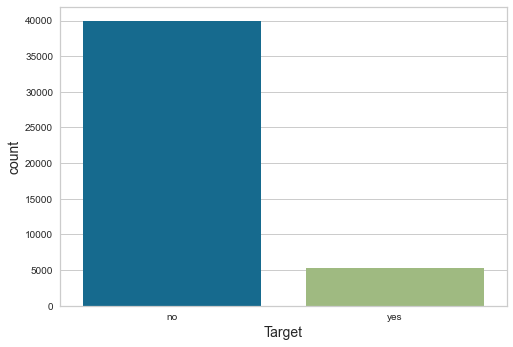

In [30]:
for i in df.columns:
    if df[i].dtypes == object:
        sns.countplot(x=df[i])
        plt.xlabel(i, fontsize=14)
        plt.ylabel("count", fontsize=14)
        plt.show()

##### <i>[Insights]
##### <i> Majority of value in "default" is "no".
##### <i> Majority of value in "poutcome" is "unknown".

#### Contingency tables to analyse relationships between categorical variables 

In [31]:
# Check for relationship between features and output variables
def get_ct(df, target, var, column):
    ct_res = pd.crosstab(df[var],df[target],margins=True)
    ct_res['Yes rate(%)'] = round(ct_res.iloc[:, column]/ct_res['All']*100,2)
    ct_res['Proportion(All)(%)'] = round(ct_res.iloc[:, 2]/ct_res.loc['All','All']*100,2)
    return ct_res

In [32]:
for col in df.columns:
    if df[col].dtypes == object:
        print("[", col, ": ", attributes[col],"]")
        print(get_ct(df, "Target", col, 1))
        print()

[ job :  Type of job (management, technician, entrepreneur, blue-collar, etc.) ]
Target            no   yes    All  Yes rate(%)  Proportion(All)(%)
job                                                               
admin.          4540   631   5171        12.20               11.44
blue-collar     9024   708   9732         7.27               21.53
entrepreneur    1364   123   1487         8.27                3.29
housemaid       1131   109   1240         8.79                2.74
management      8157  1301   9458        13.76               20.92
retired         1748   516   2264        22.79                5.01
self-employed   1392   187   1579        11.84                3.49
services        3785   369   4154         8.88                9.19
student          669   269    938        28.68                2.07
technician      6757   840   7597        11.06               16.80
unemployed      1101   202   1303        15.50                2.88
unknown          254    34    288        11.81  

##### <i> [Insights]
##### <i> Proportion of unknown is very high in "poutcome". "Yes rate" for poutcome-success is also very high.
##### <i> Proportion of no in "default" is very high. "Yes rate" for default-yes is lower (almost half) than default-no.

In [33]:
# Check for relationship between features and output variables taking into account third features - Stratified Contigency Features
# def get_stra_ct(df, target, stra_var, var, column):
#    ct_res = pd.crosstab(index=[df[stra_var], df[var]], columns=df[target], margins=True)
#    ct_res['Results (%)'] = round(ct_res[column]/ct_res['All']*100,2)
#    return ct_res.drop(columns='All').drop('All',level=0)

In [34]:
# for col in df.columns:
#     if df[col].dtypes == object:
#         print("[", col, ": ", attributes[col],"]")
#         print(get_stra_ct(df, "Target", "Target", col, 1))
#         print()

#### Column distributions

In [35]:
# Look for column distributions
for col in list(df.columns[df.dtypes=='object']):
    print("[", col, ": ", attributes[col],"]")
    print(df[col].value_counts(),'\n')

[ job :  Type of job (management, technician, entrepreneur, blue-collar, etc.) ]
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64 

[ marital :  marital status (married, single, divorced) ]
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64 

[ education :  education level (primary, secondary, tertiary) ]
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64 

[ default :  has credit in default? ]
no     44396
yes      815
Name: default, dtype: int64 

[ housing :  has housing loan? ]
yes    25130
no     20081
Name: housing, dtype: int64 

[ loan :  has personal loan? ]
no     37967
yes     7244
Name: loan, dtype: int64 

[ contact :  contact communication type ]
cellul

##### <i>[Insights]
##### <i>Majority of values in "default" is no.
##### <i>Majority of values in "poutcome" is unknown.

### Treatment for outlier

##### <i>[Insights]
##### <i>Based on the results of EDA, we noted that there are many outliers in the most numerical variables .
##### <i>As the treatment for outlier, we will normalize values in int type with Standard Scaler(Z Score).

### Normalize values in int type with Standard Scaler(Z Score)

In [36]:
print("[List of int type values]")
for i in df.columns:
    if df[i].dtypes == int:
        print("  ",i)

[List of int type values]
   age
   balance
   day
   duration
   campaign
   pdays
   previous


In [37]:
for i in df.columns:
    if df[i].dtypes == int:
        df[i] = StandardScaler().fit_transform(df[[i]])

In [38]:
df.dtypes

age          float64
job           object
marital       object
education     object
default       object
balance      float64
housing       object
loan          object
contact       object
day          float64
month         object
duration     float64
campaign     float64
pdays        float64
previous     float64
poutcome      object
Target        object
dtype: object

##### <i>[Notes]
##### <i>Because "Target" variable is object variable which is not easy to analyze, I will convert it into 1 and 0.

### Convert Yes / No in "Target" to 1 / 0

In [39]:
df["Target"].map(dict(yes=1, no=0))

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: Target, Length: 45211, dtype: int64

In [40]:
df["Target"] = df["Target"].map(dict(yes=1, no=0))

In [41]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,1.606965,management,married,tertiary,no,0.256419,yes,no,unknown,-1.298476,may,0.011016,-0.569351,0.464482,-0.251940,unknown,0
1,0.288529,technician,single,secondary,no,-0.437895,yes,no,unknown,-1.298476,may,-0.416127,-0.569351,0.464482,-0.251940,unknown,0
2,-0.747384,entrepreneur,married,secondary,no,-0.446762,yes,yes,unknown,-1.298476,may,-0.707361,-0.569351,0.464482,-0.251940,unknown,0
3,0.571051,blue-collar,married,unknown,no,0.047205,yes,no,unknown,-1.298476,may,-0.645231,-0.569351,0.464482,-0.251940,unknown,0
4,-0.747384,unknown,single,unknown,no,-0.447091,no,no,unknown,-1.298476,may,-0.233620,-0.569351,0.464482,-0.251940,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.947747,technician,married,tertiary,no,-0.176460,no,no,cellular,0.143418,nov,2.791329,0.076230,0.464482,-0.251940,unknown,1
45207,2.831227,retired,divorced,primary,no,0.120447,no,no,cellular,0.143418,nov,0.768224,-0.246560,0.464482,-0.251940,unknown,1
45208,2.925401,retired,married,secondary,no,1.429593,no,no,cellular,0.143418,nov,3.373797,0.721811,-2.231569,1.050473,success,1
45209,1.512791,blue-collar,married,secondary,no,-0.228024,no,no,telephone,0.143418,nov,0.970146,0.399020,0.464482,-0.251940,unknown,0


### Convert Object to Category

##### <i>[Notes]
##### <i>To use one hot encoding later, I will convert all the object variables to category variables.

In [42]:
for col in list(df.columns[df.dtypes=='object']):
    df[col] = df[col].astype('category')

In [43]:
df.dtypes

age           float64
job          category
marital      category
education    category
default      category
balance       float64
housing      category
loan         category
contact      category
day           float64
month        category
duration      float64
campaign      float64
pdays         float64
previous      float64
poutcome     category
Target          int64
dtype: object

### Heatmap (Correlation)

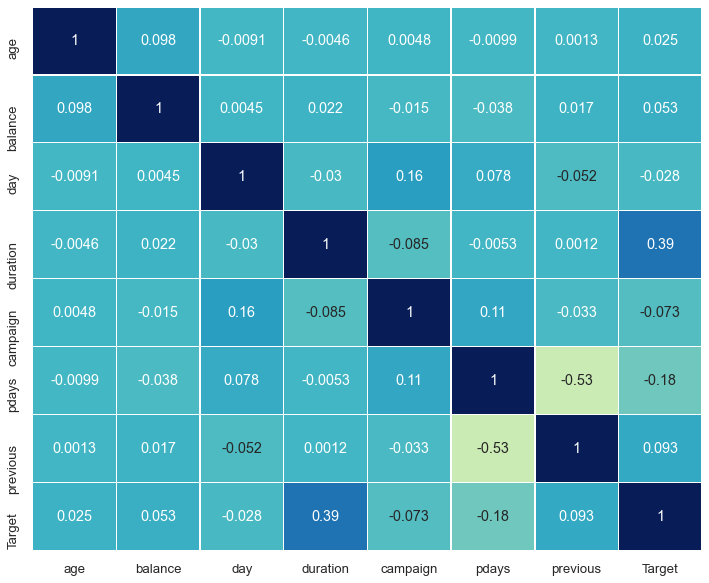

In [44]:
plt.figure(figsize=(12,10))

# Change Font size
sns.set(font_scale=1.2)

sns.heatmap(df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

plt.show()

##### <i>[Insights]
##### <i>There are relatively high correlation (> abs(0.08)) in following area
##### <i>    - pdays & previous
##### <i>    - duration & Target
##### <i>    - campaign & day
##### <i>    - pdays & Target
##### <i>    - previous & Target
##### <i>    - balance & age
##### <i>    - pdays & days (negative)
##### <i>    - campaign & duration (negative)
##### <i>    - campaign & pdays (negative)

In [45]:
####################### It take time to run this (run only needed) #######################

### Pairplot (hue="Target")

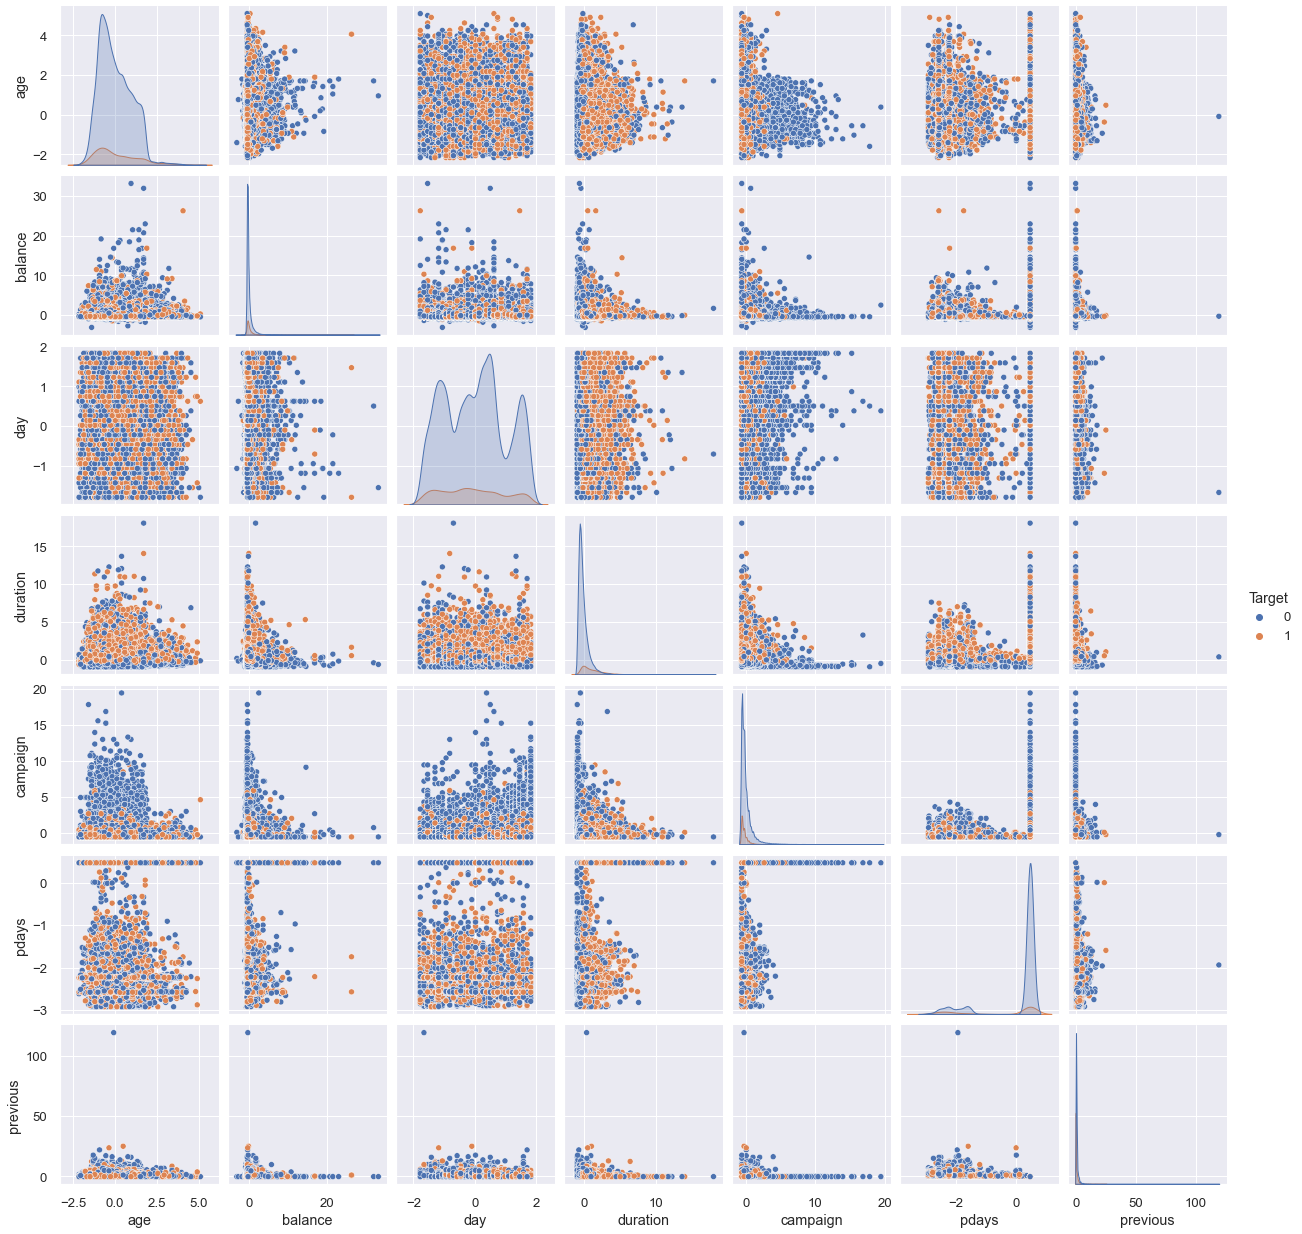

In [46]:
## Take off the comment before submitting
sns.pairplot(df, hue="Target")

In [47]:
####################### It take time to run this (run only needed) #######################

### Pairplot

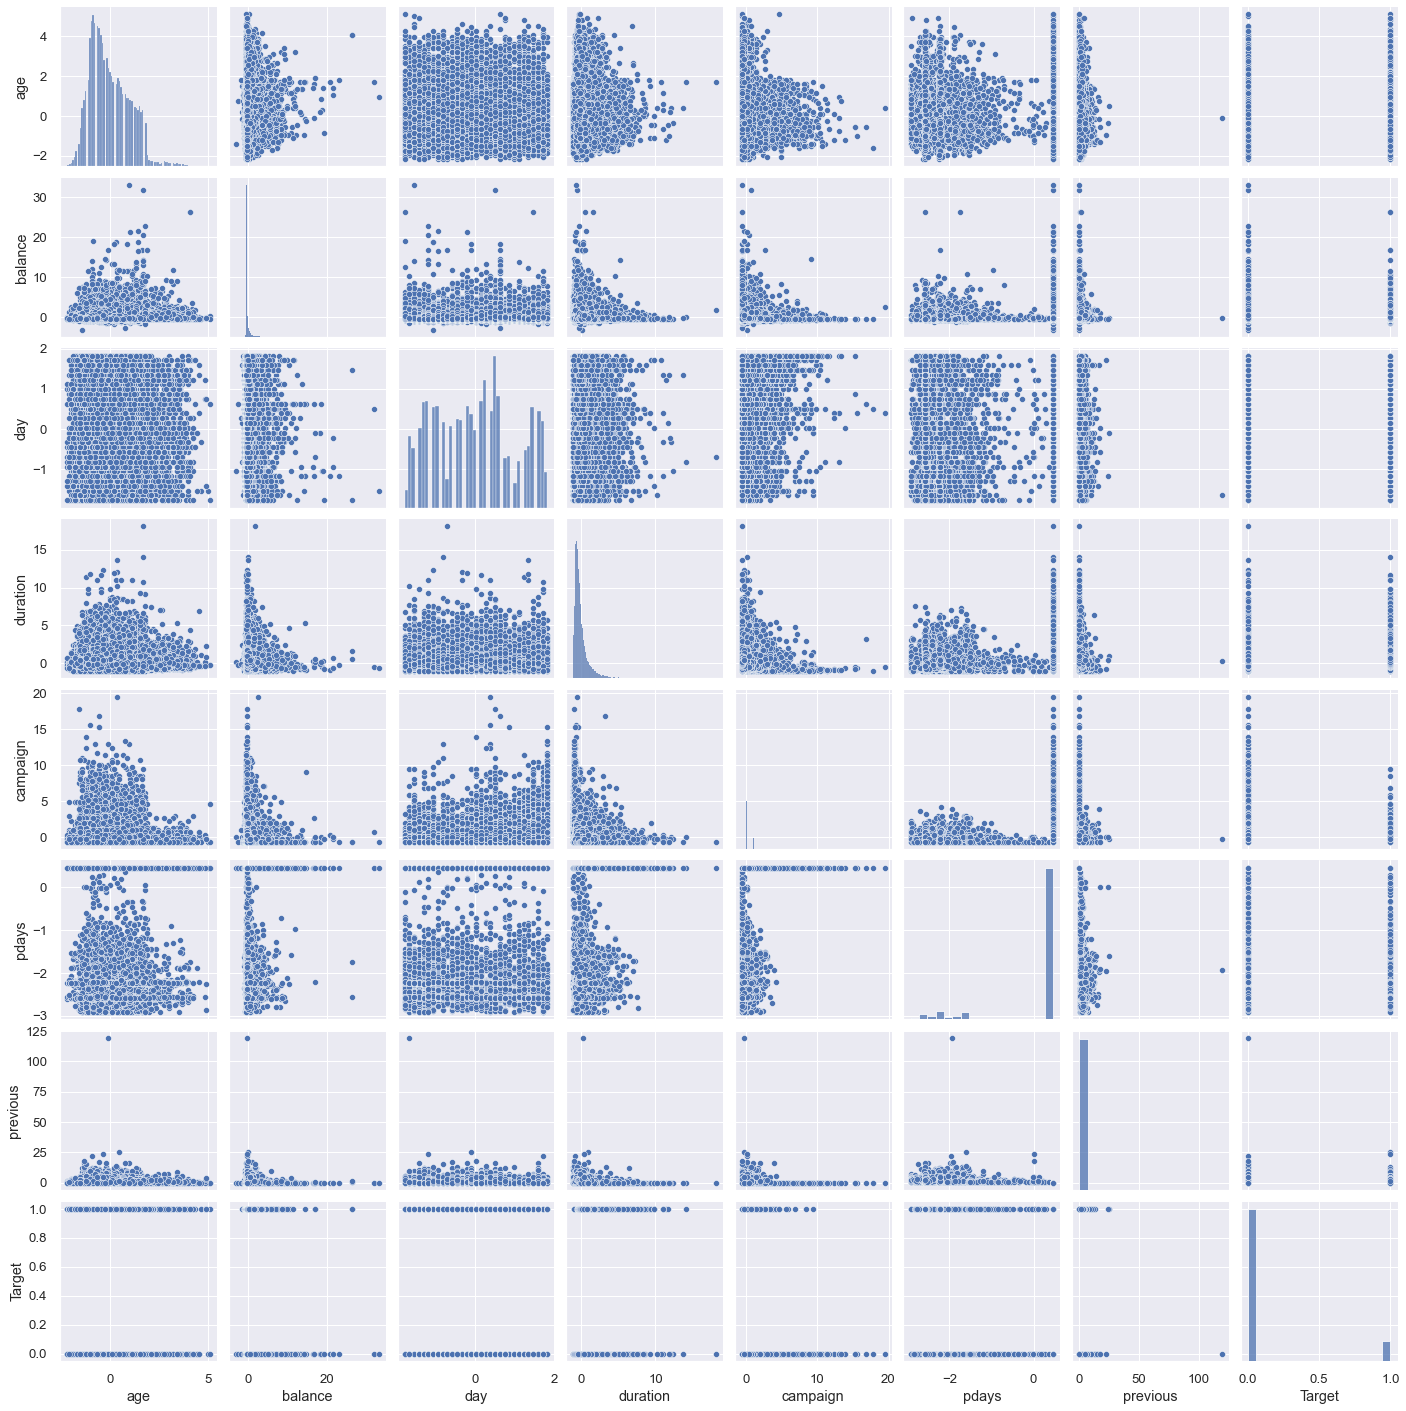

In [48]:
## Take off the comment before submitting
sns.pairplot(df)

In [49]:
###########################################################################################

### Split the data into training and test set in the ratio of 70:30 (Training:Test) based on dependent and independent variables.

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  float64 
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  float64 
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  float64 
 10  month      45211 non-null  category
 11  duration   45211 non-null  float64 
 12  campaign   45211 non-null  float64 
 13  pdays      45211 non-null  float64 
 14  previous   45211 non-null  float64 
 15  poutcome   45211 non-null  category
 16  Target     45211 non-null  int64   
dtypes: category(9), float64(7), int64(1)
memory usage: 3.1 MB


In [51]:
df_copy = df.copy()

In [52]:
df = pd.get_dummies(df, drop_first=True)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  45211 non-null  float64
 1   balance              45211 non-null  float64
 2   day                  45211 non-null  float64
 3   duration             45211 non-null  float64
 4   campaign             45211 non-null  float64
 5   pdays                45211 non-null  float64
 6   previous             45211 non-null  float64
 7   Target               45211 non-null  int64  
 8   job_blue-collar      45211 non-null  uint8  
 9   job_entrepreneur     45211 non-null  uint8  
 10  job_housemaid        45211 non-null  uint8  
 11  job_management       45211 non-null  uint8  
 12  job_retired          45211 non-null  uint8  
 13  job_self-employed    45211 non-null  uint8  
 14  job_services         45211 non-null  uint8  
 15  job_student          45211 non-null 

# Models

### Function to draw a Confusion Matrix

In [54]:
## function to get confusion matrix in a proper format
def draw_cm(actual, predicted):
    plt.figure(figsize=(5,4))
    cm = confusion_matrix(actual, predicted, labels=[1,0]).T
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=[1,0], yticklabels=[1,0], cmap="Blues", vmin=0, vmax=1500)
    plt.ylabel('Predicted')
    plt.xlabel('Observed')
    plt.show();

### Logistic Regression

In [55]:
model_name = 'Logistic Regression'

features = [col for col in df.columns if col != 'Target']

X = df[features]
y = df['Target']

# Because y variable (Target) is imbalanced (No=88%, Yes=12%), use "stratify=y" to have a better split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=.3, 
                                                    random_state=1,
                                                    stratify=y)
X_train.shape, X_test.shape

((31647, 42), (13564, 42))

In [56]:
logReg = LogisticRegression(random_state=1, max_iter=10000)
#logReg = LogisticRegression(random_state=1)
logReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
logReg.predict_proba(X_test)

array([[0.96151924, 0.03848076],
       [0.81192736, 0.18807264],
       [0.94433093, 0.05566907],
       ...,
       [0.98767371, 0.01232629],
       [0.95349261, 0.04650739],
       [0.97688588, 0.02311412]])

In [58]:
# Calculate the best threshold
fpr, tpr, thresholds = roc_curve(y_test, logReg.predict_proba(X_test)[:,1])
J = tpr - fpr
ix = np.argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

Best Threshold=0.082554


In [59]:
# Use the best threshold determined above
threshold = best_thresh
y_predict = np.where(logReg.predict_proba(X_test)[:,1]>threshold, 1, 0)
y_predict

array([0, 1, 0, ..., 0, 0, 0])

Trainig accuracy 0.902960786172465
Testing accuracy 0.90002948982601

Recall: 0.8998109640831758
Precision: 0.34576271186440677

F1 Score: 0.49956270771383593
Roc Auc Score: 0.8371059496044168

Confusion Matrix


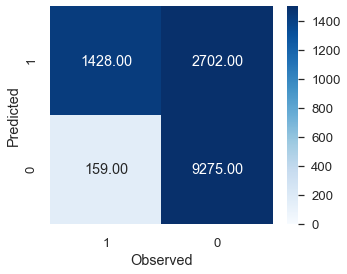

In [60]:
model = logReg

accuracy_training = model.score(X_train,y_train)
accuracy_testing = model.score(X_test, y_test)
score_recall = recall_score(y_test,y_predict)
score_precision = precision_score(y_test,y_predict)
score_f1 = f1_score(y_test,y_predict)
score_ROCAUC = roc_auc_score(y_test,y_predict)

print("Trainig accuracy", accuracy_training)  
print("Testing accuracy", accuracy_testing)
print()
print("Recall:", score_recall)
print("Precision:", score_precision)
print()
print("F1 Score:", score_f1)
print("Roc Auc Score:", score_ROCAUC)
print()
print('Confusion Matrix')
draw_cm(y_test,y_predict)

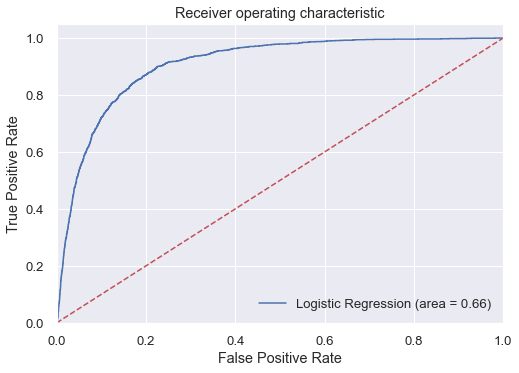

In [61]:
roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
# If i have a  model where we always predict positive reults - 100% TPR, 100% FPR 
# If we always predict 0-> 0% TPR , 0% FPR; BEST MODEL 100% TPR, 0% FPR, - better we have , better the model.

In [62]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':[model_name],
                          'Training accuracy': [accuracy_training],
                          'Testing accuracy': [accuracy_testing],
                          'Recall': [score_recall],
                          'Precision': [score_precision],
                          'F1': [score_f1],
                          'ROC AUC': [score_ROCAUC],
                         })
resultsDf = resultsDf[['Method', 'Training accuracy', 'Testing accuracy', 'Recall', 'Precision', 'F1', 'ROC AUC']]
resultsDf

,Method,Training accuracy,Testing accuracy,Recall,Precision,F1,ROC AUC
0,Logistic Regression,0.902961,0.900029,0.899811,0.345763,0.499563,0.837106


In [63]:
## Feature Importance or Coefficients 
fi = pd.DataFrame()
fi['Col'] = X_train.columns
fi['Coeff'] = np.round(abs(model.coef_[0]),2)
fi.sort_values(by='Coeff',ascending=False)

,Col,Coeff
40,poutcome_success,2.35
27,contact_unknown,1.58
34,month_mar,1.58
31,month_jan,1.21
3,duration,1.10
38,month_sep,0.96
32,month_jul,0.87
37,month_oct,0.83
36,month_nov,0.78
28,month_aug,0.71


### Logistic Regression (Preprocessing Scale)

In [64]:
model_name = 'Logistic Regression (Preprocessing Scale)'

features = [col for col in df.columns if col != 'Target']

X = df[features]
y = df['Target']

# Because y variable (Target) is imbalanced (No=88%, Yes=12%), use "stratify=y" to have a better split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=.3, 
                                                    random_state=1,
                                                    stratify=y)
X_train.shape, X_test.shape

((31647, 42), (13564, 42))

In [65]:
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

In [66]:
logReg = LogisticRegression(random_state=1)
logReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
logReg.predict_proba(X_test)

array([[0.96129078, 0.03870922],
       [0.81068394, 0.18931606],
       [0.94466375, 0.05533625],
       ...,
       [0.987762  , 0.012238  ],
       [0.95330508, 0.04669492],
       [0.97734357, 0.02265643]])

In [68]:
# Calculate the best threshold
fpr, tpr, thresholds = roc_curve(y_test, logReg.predict_proba(X_test)[:,1])
J = tpr - fpr
ix = np.argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

Best Threshold=0.092844


In [69]:
# Use the threshold calculated above
threshold = best_thresh
y_predict = np.where(logReg.predict_proba(X_test)[:,1]>threshold, 1, 0)
y_predict

array([0, 1, 0, ..., 0, 0, 0])

Trainig accuracy 0.9031503776029324
Testing accuracy 0.9003981126511353

Recall: 0.8739760554505356
Precision: 0.36528838556755333

F1 Score: 0.5152303120356612
Roc Auc Score: 0.8363785261806406

Confusion Matrix


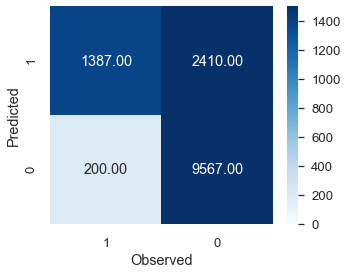

In [70]:
model = logReg

accuracy_training = model.score(X_train,y_train)
accuracy_testing = model.score(X_test, y_test)
score_recall = recall_score(y_test,y_predict)
score_precision = precision_score(y_test,y_predict)
score_f1 = f1_score(y_test,y_predict)
score_ROCAUC = roc_auc_score(y_test,y_predict)

print("Trainig accuracy", accuracy_training)  
print("Testing accuracy", accuracy_testing)
print()
print("Recall:", score_recall)
print("Precision:", score_precision)
print()
print("F1 Score:", score_f1)
print("Roc Auc Score:", score_ROCAUC)
print()
print('Confusion Matrix')
draw_cm(y_test,y_predict)

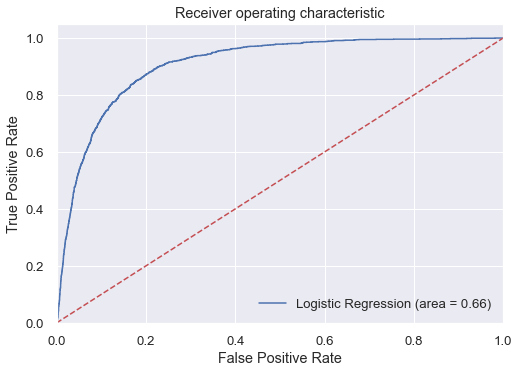

In [71]:
roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
# If i have a  model where we always predict positive reults - 100% TPR, 100% FPR 
# If we always predict 0-> 0% TPR , 0% FPR; BEST MODEL 100% TPR, 0% FPR, - better we have , better the model.

In [72]:
tempResultsDf = pd.DataFrame({'Method':[model_name],
                          'Training accuracy': [accuracy_training],
                          'Testing accuracy': [accuracy_testing],
                          'Recall': [score_recall],
                          'Precision': [score_precision],
                          'F1': [score_f1],
                          'ROC AUC': [score_ROCAUC],
                         })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Training accuracy', 'Testing accuracy', 'Recall', 'Precision', 'F1', 'ROC AUC']]
resultsDf

,Method,Training accuracy,Testing accuracy,Recall,Precision,F1,ROC AUC
0,Logistic Regression,0.902961,0.900029,0.899811,0.345763,0.499563,0.837106
0,Logistic Regression (Preprocessing Scale),0.903150,0.900398,0.873976,0.365288,0.515230,0.836379


### Decision Tree (Gini)

In [73]:
model_name = 'Decision Tree (Gini)'

features = [col for col in df.columns if col != 'Target']

X = df[features]
y = df['Target']

# Because y variable (Target) is imbalanced (No=88%, Yes=12%), use "stratify=y" to have a better split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=.3, 
                                                    random_state=1,
                                                    stratify=y)

X_train.shape, X_test.shape

((31647, 42), (13564, 42))

In [74]:
# invoking the decision tree classifier function. Using 'gini' method of finding the split columns. Other option 
# could be entropy index.  

tree = DecisionTreeClassifier(criterion='gini', random_state=1, max_depth=5, min_samples_leaf=25)

In [75]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=25, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [76]:
tree.score(X_train, y_train)

0.9054254747685405

In [77]:
tree.score(X_test, y_test)

0.9017251548215865

Trainig accuracy 0.9054254747685405
Testing accuracy 0.9017251548215865

Recall: 0.3755513547574039
Precision: 0.6353944562899787

F1 Score: 0.4720792079207921
Roc Auc Score: 0.6734983124292155

Confusion Matrix


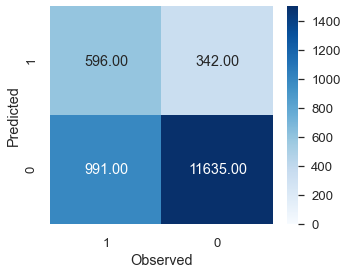

In [78]:
model = tree
y_predict = model.predict(X_test)

accuracy_training = model.score(X_train,y_train)
accuracy_testing = model.score(X_test, y_test)
score_recall = recall_score(y_test,y_predict)
score_precision = precision_score(y_test,y_predict)
score_f1 = f1_score(y_test,y_predict)
score_ROCAUC = roc_auc_score(y_test,y_predict)

print("Trainig accuracy", accuracy_training)  
print("Testing accuracy", accuracy_testing)
print()
print("Recall:", score_recall)
print("Precision:", score_precision)
print()
print("F1 Score:", score_f1)
print("Roc Auc Score:", score_ROCAUC)
print()
print('Confusion Matrix')
draw_cm(y_test,y_predict)

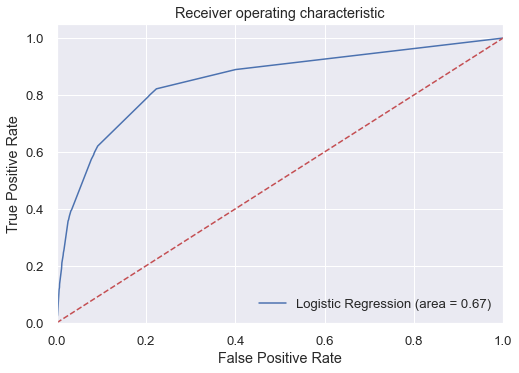

In [79]:
roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
# If i have a  model where we always predict positive reults - 100% TPR, 100% FPR 
# If we always predict 0-> 0% TPR , 0% FPR; BEST MODEL 100% TPR, 0% FPR, - better we have , better the model.

In [80]:
tempResultsDf = pd.DataFrame({'Method':[model_name],
                          'Training accuracy': [accuracy_training],
                          'Testing accuracy': [accuracy_testing],
                          'Recall': [score_recall],
                          'Precision': [score_precision],
                          'F1': [score_f1],
                          'ROC AUC': [score_ROCAUC],
                         })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Training accuracy', 'Testing accuracy', 'Recall', 'Precision', 'F1', 'ROC AUC']]
resultsDf

,Method,Training accuracy,Testing accuracy,Recall,Precision,F1,ROC AUC
0,Logistic Regression,0.902961,0.900029,0.899811,0.345763,0.499563,0.837106
0,Logistic Regression (Preprocessing Scale),0.903150,0.900398,0.873976,0.365288,0.515230,0.836379
0,Decision Tree (Gini),0.905425,0.901725,0.375551,0.635394,0.472079,0.673498


In [81]:
print(pd.DataFrame(tree.feature_importances_, columns=["Imp"], index=X_train.columns))

                          Imp
age                  0.000000
balance              0.001258
day                  0.000000
duration             0.550172
campaign             0.000000
pdays                0.009649
previous             0.001005
job_blue-collar      0.000000
job_entrepreneur     0.000000
job_housemaid        0.000000
job_management       0.000000
job_retired          0.000000
job_self-employed    0.000000
job_services         0.000000
job_student          0.000000
job_technician       0.000000
job_unemployed       0.000000
job_unknown          0.000000
marital_married      0.001269
marital_single       0.002310
education_secondary  0.000000
education_tertiary   0.000000
education_unknown    0.000000
default_yes          0.000000
housing_yes          0.041997
loan_yes             0.000000
contact_telephone    0.000000
contact_unknown      0.020402
month_aug            0.000000
month_dec            0.000000
month_feb            0.000000
month_jan            0.000000
month_jul 

In [82]:
pd.DataFrame(tree.feature_importances_, columns=["Imp"], index=X_train.columns).sort_values(by="Imp", ascending=False)

,Imp
duration,0.550172
poutcome_success,0.306039
month_mar,0.044766
housing_yes,0.041997
contact_unknown,0.020402
pdays,0.009649
month_jun,0.008871
month_oct,0.007325
month_may,0.003470
marital_single,0.002310


##### <i>[Insight]
##### <i>It seems like, in Decision Tree, Job and Education does not affect to the result.

### Decision Tree (Gini) (GridSearch)

In [83]:
model_name = 'Decision Tree (Gini) (GridSearch)'

features = [col for col in df.columns if col != 'Target']

X = df[features]
y = df['Target']

# Because y variable (Target) is imbalanced (No=88%, Yes=12%), use "stratify=y" to have a better split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=.3, 
                                                    random_state=1,
                                                    stratify=y)

X_train.shape, X_test.shape

((31647, 42), (13564, 42))

In [84]:
# invoking the decision tree classifier function. Using 'gini' method of finding the split columns. Other option 
# could be entropy index.  

tree = DecisionTreeClassifier(criterion='gini', random_state=1, max_depth=5, min_samples_leaf=25)

In [85]:
# GridSearch (This takes a while to run)
#
grid_values = {'criterion' : ['gini', 'entropy'],
               'splitter' : ['best', 'random'],
               'max_depth' : np.arange(5,10),
               'min_samples_leaf' : np.arange(10,15)
              }
#  
# [Result from the code above]
# Best Parameter : {'criterion': 'gini', 
#                   'max_depth': 7, 
#                   'min_samples_leaf': 13, 
#                   'splitter': 'best'}
#
# This is based on the best parameter from the GridSearch ran previously
# grid_values = {'criterion' : ['gini'],
#                'splitter' : ['best'],
#                'max_depth' : np.arange(7,8),
#                'min_samples_leaf' : np.arange(13,14)
#               }

grid_tree_f1 = GridSearchCV(tree, param_grid = grid_values,scoring = 'f1')
grid_tree_f1.fit(X_train, y_train)

#Predict values based on new parameters
y_pred_f1 = grid_tree_f1.predict(X_test)
# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_f1)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_f1)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_f1)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_f1)))
print('Best Parameter : ' + str(grid_tree_f1.best_params_))



Accuracy Score : 0.9017251548215865
Precision Score : 0.615036231884058
Recall Score : 0.42785129174543163
F1 Score : 0.5046451133407654
Best Parameter : {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 13, 'splitter': 'best'}


Trainig accuracy 0.9103864505324359
Testing accuracy 0.9017251548215865

Recall: 0.42785129174543163
Precision: 0.615036231884058

F1 Score: 0.5046451133407654
Roc Auc Score: 0.6961833063887047

Confusion Matrix


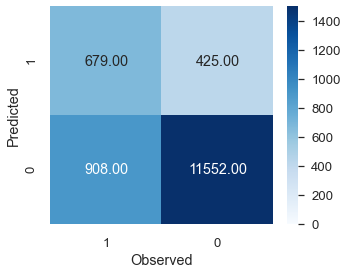

In [86]:
model = grid_tree_f1
y_predict = model.predict(X_test)

#accuracy_training = model.score(X_train,y_train)
accuracy_training = accuracy_score(y_train, model.predict(X_train))
#accuracy_testing = model.score(X_test, y_test)
accuracy_testing = accuracy_score(y_test, y_predict)
score_recall = recall_score(y_test,y_predict)
score_precision = precision_score(y_test,y_predict)
score_f1 = f1_score(y_test,y_predict)
score_ROCAUC = roc_auc_score(y_test,y_predict)

print("Trainig accuracy", accuracy_training)  
print("Testing accuracy", accuracy_testing)
print()
print("Recall:", score_recall)
print("Precision:", score_precision)
print()
print("F1 Score:", score_f1)
print("Roc Auc Score:", score_ROCAUC)
print()
print('Confusion Matrix')
draw_cm(y_test,y_predict)

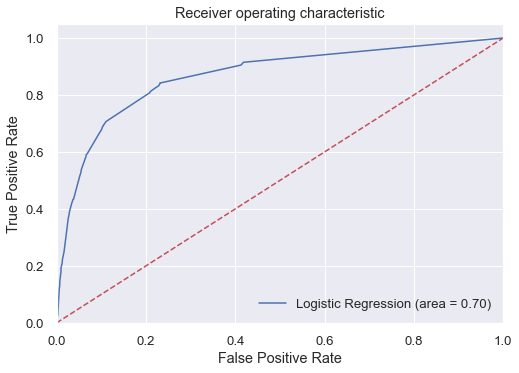

In [87]:
roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
# If i have a  model where we always predict positive reults - 100% TPR, 100% FPR 
# If we always predict 0-> 0% TPR , 0% FPR; BEST MODEL 100% TPR, 0% FPR, - better we have , better the model.

In [88]:
tempResultsDf = pd.DataFrame({'Method':[model_name],
                          'Training accuracy': [accuracy_training],
                          'Testing accuracy': [accuracy_testing],
                          'Recall': [score_recall],
                          'Precision': [score_precision],
                          'F1': [score_f1],
                          'ROC AUC': [score_ROCAUC],
                         })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Training accuracy', 'Testing accuracy', 'Recall', 'Precision', 'F1', 'ROC AUC']]
resultsDf

,Method,Training accuracy,Testing accuracy,Recall,Precision,F1,ROC AUC
0,Logistic Regression,0.902961,0.900029,0.899811,0.345763,0.499563,0.837106
0,Logistic Regression (Preprocessing Scale),0.903150,0.900398,0.873976,0.365288,0.515230,0.836379
0,Decision Tree (Gini),0.905425,0.901725,0.375551,0.635394,0.472079,0.673498
0,Decision Tree (Gini) (GridSearch),0.910386,0.901725,0.427851,0.615036,0.504645,0.696183


##### <i>[Insights]
##### <i>Preprocessing Scale improved the performance of Logistic Regression from F1 Score perspective.
##### <i>Grid Search improved the performance of Decision Tree from the F1 Score perspective.
##### <i>Logistic Regression have good performance in Recall, F1 and ROC AUC. 
##### <i>Decision Tree have good performance in Precision.
##### <i>False Positive is high in Logistic Regression.
##### <i>False Negative is high in Decision Tree.
##### <i>Overall, Logistic Regression seems to have better performance than Decision Tree.

### Bagging (Bootstrap aggregating)

In [89]:
model_name = 'Bagging (Bootstrap aggregating)'

features = [col for col in df.columns if col != 'Target']

X = df[features]
y = df['Target']

# Because y variable (Target) is imbalanced (No=88%, Yes=12%), use "stratify=y" to have a better split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=.3, 
                                                    random_state=1,
                                                    stratify=y)

X_train.shape, X_test.shape

((31647, 42), (13564, 42))

In [90]:
baggingCl = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=1)
baggingCl = baggingCl.fit(X_train, y_train)

In [91]:
# Make predictions and calculate accuracy
pred_BG = baggingCl.predict(X_test)
acc_BG = accuracy_score(y_test, pred_BG)
acc_BG

0.9051164848127397

In [92]:
# tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy': [acc_BG]})
# resultsDf = pd.concat([resultsDf, tempResultsDf])
# resultsDf = resultsDf[['Method', 'accuracy']]
# resultsDf

Trainig accuracy 0.9929219199292192
Testing accuracy 0.9051164848127397

Recall: 0.45179584120982985
Precision: 0.6322751322751323

F1 Score: 0.5270121278941566
Roc Auc Score: 0.7084895545700148

Confusion Matrix


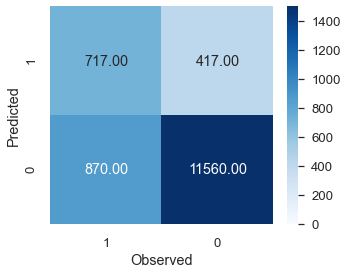

In [93]:
model = baggingCl
y_predict = model.predict(X_test)

accuracy_training = model.score(X_train,y_train)
accuracy_testing = model.score(X_test, y_test)
score_recall = recall_score(y_test,y_predict)
score_precision = precision_score(y_test,y_predict)
score_f1 = f1_score(y_test,y_predict)
score_ROCAUC = roc_auc_score(y_test,y_predict)

print("Trainig accuracy", accuracy_training)  
print("Testing accuracy", accuracy_testing)
print()
print("Recall:", score_recall)
print("Precision:", score_precision)
print()
print("F1 Score:", score_f1)
print("Roc Auc Score:", score_ROCAUC)
print()
print('Confusion Matrix')
draw_cm(y_test,y_predict)

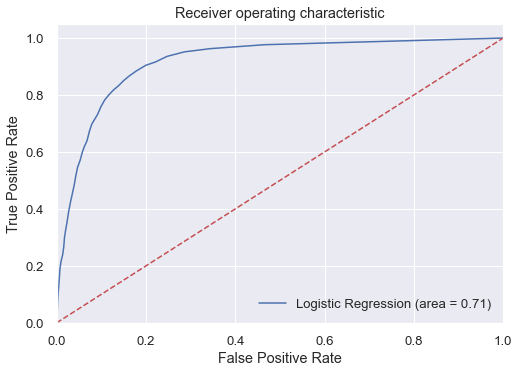

In [94]:
roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
# If i have a  model where we always predict positive reults - 100% TPR, 100% FPR 
# If we always predict 0-> 0% TPR , 0% FPR; BEST MODEL 100% TPR, 0% FPR, - better we have , better the model.

In [95]:
tempResultsDf = pd.DataFrame({'Method':[model_name],
                          'Training accuracy': [accuracy_training],
                          'Testing accuracy': [accuracy_testing],
                          'Recall': [score_recall],
                          'Precision': [score_precision],
                          'F1': [score_f1],
                          'ROC AUC': [score_ROCAUC],
                         })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Training accuracy', 'Testing accuracy', 'Recall', 'Precision', 'F1', 'ROC AUC']]
resultsDf

,Method,Training accuracy,Testing accuracy,Recall,Precision,F1,ROC AUC
0,Logistic Regression,0.902961,0.900029,0.899811,0.345763,0.499563,0.837106
0,Logistic Regression (Preprocessing Scale),0.903150,0.900398,0.873976,0.365288,0.515230,0.836379
0,Decision Tree (Gini),0.905425,0.901725,0.375551,0.635394,0.472079,0.673498
0,Decision Tree (Gini) (GridSearch),0.910386,0.901725,0.427851,0.615036,0.504645,0.696183
0,Bagging (Bootstrap aggregating),0.992922,0.905116,0.451796,0.632275,0.527012,0.708490


### Bagging (Bootstrap aggregating) (Grid Search)

In [96]:
model_name = 'Bagging (Bootstrap aggregating) (Grid Search)'

features = [col for col in df.columns if col != 'Target']

X = df[features]
y = df['Target']

# Because y variable (Target) is imbalanced (No=88%, Yes=12%), use "stratify=y" to have a better split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=.3, 
                                                    random_state=1,
                                                    stratify=y)

X_train.shape, X_test.shape

((31647, 42), (13564, 42))

In [97]:
baggingCl = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=1)
#baggingCl = baggingCl.fit(X_train, y_train)

In [98]:
# Grid Search (This code takes a while to ran)
grid_values = {'n_estimators' : np.arange(80, 110, 10),
               'max_samples' : np.arange(.4, .7, 0.1),
               'bootstrap' : [True],
               'oob_score' : [True]
              }
#
# [Result from the code above]
# Best Parameters : {'bootstrap': True, 
#                    'max_samples': 0.7, 
#                    'n_estimators': 110, 
#                    'oob_score': True}
#
# This is based on the best parameter from the GridSearch ran previously
# grid_values = {'n_estimators' : np.arange(110, 120, 10),
#                'max_samples' : np.arange(.7, .8, 0.1),
#                'bootstrap' : [True],
#                'oob_score' : [True]
#               }

grid_clf_acc = GridSearchCV(baggingCl, param_grid = grid_values)
grid_clf_acc.fit(X_train, y_train)

#Predict values based on new parameters
y_pred_acc = grid_clf_acc.predict(X_test)
# New Model Evaluation metrics 
print('Evaluation Score : ' + str(grid_clf_acc.score(X_test,y_test)))
print('Best Parameters : ' + str(grid_clf_acc.best_params_))

Evaluation Score : 0.9058537304629902
Best Parameters : {'bootstrap': True, 'max_samples': 0.4, 'n_estimators': 90, 'oob_score': True}


Trainig accuracy 0.9697285682687142
Testing accuracy 0.9058537304629902

Recall: 0.4562066792690611
Precision: 0.6362038664323374

F1 Score: 0.5313761467889908
Roc Auc Score: 0.7108202136430468

Confusion Matrix


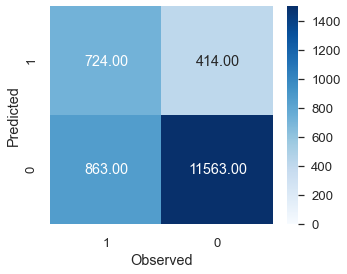

In [99]:
model = grid_clf_acc
y_predict = model.predict(X_test)

accuracy_training = model.score(X_train,y_train)
accuracy_testing = model.score(X_test, y_test)
score_recall = recall_score(y_test,y_predict)
score_precision = precision_score(y_test,y_predict)
score_f1 = f1_score(y_test,y_predict)
score_ROCAUC = roc_auc_score(y_test,y_predict)

print("Trainig accuracy", accuracy_training)  
print("Testing accuracy", accuracy_testing)
print()
print("Recall:", score_recall)
print("Precision:", score_precision)
print()
print("F1 Score:", score_f1)
print("Roc Auc Score:", score_ROCAUC)
print()
print('Confusion Matrix')
draw_cm(y_test,y_predict)

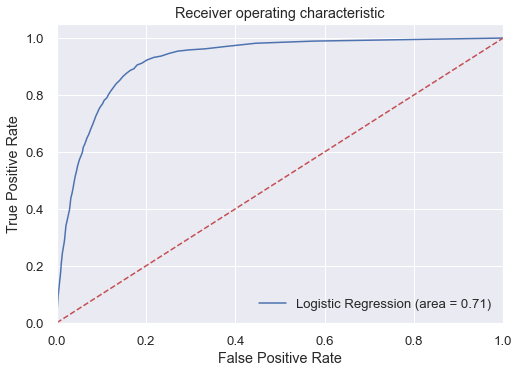

In [100]:
roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
# If i have a  model where we always predict positive reults - 100% TPR, 100% FPR 
# If we always predict 0-> 0% TPR , 0% FPR; BEST MODEL 100% TPR, 0% FPR, - better we have , better the model.

In [101]:
tempResultsDf = pd.DataFrame({'Method':[model_name],
                          'Training accuracy': [accuracy_training],
                          'Testing accuracy': [accuracy_testing],
                          'Recall': [score_recall],
                          'Precision': [score_precision],
                          'F1': [score_f1],
                          'ROC AUC': [score_ROCAUC],
                         })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Training accuracy', 'Testing accuracy', 'Recall', 'Precision', 'F1', 'ROC AUC']]
resultsDf

,Method,Training accuracy,Testing accuracy,Recall,Precision,F1,ROC AUC
0,Logistic Regression,0.902961,0.900029,0.899811,0.345763,0.499563,0.837106
0,Logistic Regression (Preprocessing Scale),0.903150,0.900398,0.873976,0.365288,0.515230,0.836379
0,Decision Tree (Gini),0.905425,0.901725,0.375551,0.635394,0.472079,0.673498
0,Decision Tree (Gini) (GridSearch),0.910386,0.901725,0.427851,0.615036,0.504645,0.696183
0,Bagging (Bootstrap aggregating),0.992922,0.905116,0.451796,0.632275,0.527012,0.708490
0,Bagging (Bootstrap aggregating) (Grid Search),0.969729,0.905854,0.456207,0.636204,0.531376,0.710820


### Boosting (Ada Boost)(Grid Search)

In [102]:
model_name = 'Boosting (Ada Boost)(Grid Search)'

features = [col for col in df.columns if col != 'Target']

X = df[features]
y = df['Target']

# Because y variable (Target) is imbalanced (No=88%, Yes=12%), use "stratify=y" to have a better split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=.3, 
                                                    random_state=1,
                                                    stratify=y)

X_train.shape, X_test.shape

((31647, 42), (13564, 42))

In [103]:
adaBoostCl = AdaBoostClassifier(n_estimators = 110, learning_rate=0.1, random_state=1)
adaBoostCl = adaBoostCl.fit(X_train, y_train)

In [104]:
# Grid Search (This code takes a while to ran)
grid_values = {'n_estimators' : np.arange(200, 240, 10),
               'learning_rate' : np.arange(.17, .20, 0.01),
               'random_state' : [1]
              }
#
# [Result from the code above]
# Best Parameters : {'learning_rate': 0.18000000000000002, 
#                    'n_estimators': 250, 
#                    'random_state': 1}
#
# This is based on the best parameter from the GridSearch ran previously
# grid_values = {'n_estimators' : np.arange(250, 260, 10),
#                'learning_rate' : np.arange(.18, .19, 0.1),
#                'random_state' : [1]
#               }

grid_clf_acc = GridSearchCV(adaBoostCl, param_grid = grid_values)
grid_clf_acc.fit(X_train, y_train)

#Predict values based on new parameters
y_pred_acc = grid_clf_acc.predict(X_test)
# New Model Evaluation metrics 
print('Evaluation Score : ' + str(grid_clf_acc.score(X_test,y_test)))
print('Best Parameters : ' + str(grid_clf_acc.best_params_))

Evaluation Score : 0.9006930109112357
Best Parameters : {'learning_rate': 0.18000000000000002, 'n_estimators': 220, 'random_state': 1}


Trainig accuracy 0.9009384775808134
Testing accuracy 0.9006930109112357

Recall: 0.3427851291745432
Precision: 0.6415094339622641

F1 Score: 0.44681724845995896
Roc Auc Score: 0.6587015735210613

Confusion Matrix


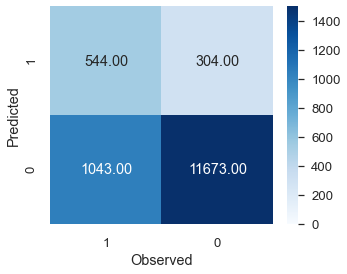

In [105]:
model = grid_clf_acc
y_predict = model.predict(X_test)

accuracy_training = model.score(X_train,y_train)
accuracy_testing = model.score(X_test, y_test)
score_recall = recall_score(y_test,y_predict)
score_precision = precision_score(y_test,y_predict)
score_f1 = f1_score(y_test,y_predict)
score_ROCAUC = roc_auc_score(y_test,y_predict)

print("Trainig accuracy", accuracy_training)  
print("Testing accuracy", accuracy_testing)
print()
print("Recall:", score_recall)
print("Precision:", score_precision)
print()
print("F1 Score:", score_f1)
print("Roc Auc Score:", score_ROCAUC)
print()
print('Confusion Matrix')
draw_cm(y_test,y_predict)

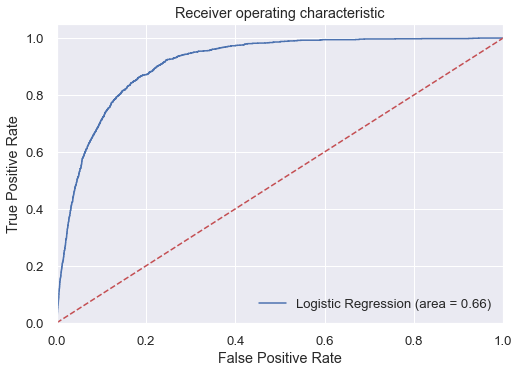

In [106]:
roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
# If i have a  model where we always predict positive reults - 100% TPR, 100% FPR 
# If we always predict 0-> 0% TPR , 0% FPR; BEST MODEL 100% TPR, 0% FPR, - better we have , better the model.

In [107]:
tempResultsDf = pd.DataFrame({'Method':[model_name],
                          'Training accuracy': [accuracy_training],
                          'Testing accuracy': [accuracy_testing],
                          'Recall': [score_recall],
                          'Precision': [score_precision],
                          'F1': [score_f1],
                          'ROC AUC': [score_ROCAUC],
                         })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Training accuracy', 'Testing accuracy', 'Recall', 'Precision', 'F1', 'ROC AUC']]
resultsDf

,Method,Training accuracy,Testing accuracy,Recall,Precision,F1,ROC AUC
0,Logistic Regression,0.902961,0.900029,0.899811,0.345763,0.499563,0.837106
0,Logistic Regression (Preprocessing Scale),0.903150,0.900398,0.873976,0.365288,0.515230,0.836379
0,Decision Tree (Gini),0.905425,0.901725,0.375551,0.635394,0.472079,0.673498
0,Decision Tree (Gini) (GridSearch),0.910386,0.901725,0.427851,0.615036,0.504645,0.696183
0,Bagging (Bootstrap aggregating),0.992922,0.905116,0.451796,0.632275,0.527012,0.708490
0,Bagging (Bootstrap aggregating) (Grid Search),0.969729,0.905854,0.456207,0.636204,0.531376,0.710820
0,Boosting (Ada Boost)(Grid Search),0.900938,0.900693,0.342785,0.641509,0.446817,0.658702


### Boosting (Gradient Boost)(Grid Search)

In [108]:
model_name = 'Boosting (Gradient Boost)(Grid Search)'

features = [col for col in df.columns if col != 'Target']

X = df[features]
y = df['Target']

# Because y variable (Target) is imbalanced (No=88%, Yes=12%), use "stratify=y" to have a better split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=.3, 
                                                    random_state=1,
                                                    stratify=y)

X_train.shape, X_test.shape

((31647, 42), (13564, 42))

In [109]:
gradientBoostCl = GradientBoostingClassifier(n_estimators = 110, learning_rate = 0.1, random_state=1)
gradientBoostCl = gradientBoostCl.fit(X_train, y_train)

In [110]:
# Grid Search (This code takes a while to ran)
grid_values = {'n_estimators' : np.arange(260, 290, 10),
               'learning_rate' : np.arange(.14, .19, 0.01),
               'random_state' : [1]
              }
#
# [Result from the code above]
# Best Parameters : {'learning_rate': 0.18000000000000002, 
#                    'n_estimators': 270, 
#                    'random_state': 1}
#
# This is based on the best parameter from the GridSearch ran previously
# grid_values = {'n_estimators' : np.arange(270, 280, 10),
#                'learning_rate' : np.arange(.18, .19, 0.1),
#                'random_state' : [1]
#               }

grid_clf_acc = GridSearchCV(gradientBoostCl, param_grid = grid_values)
grid_clf_acc.fit(X_train, y_train)

#Predict values based on new parameters
y_pred_acc = grid_clf_acc.predict(X_test)
# New Model Evaluation metrics 
print('Evaluation Score : ' + str(grid_clf_acc.score(X_test,y_test)))
print('Best Parameters : ' + str(grid_clf_acc.best_params_))

Evaluation Score : 0.9086552639339428
Best Parameters : {'learning_rate': 0.16000000000000003, 'n_estimators': 280, 'random_state': 1}


Trainig accuracy 0.9271968907005403
Testing accuracy 0.9086552639339428

Recall: 0.465658475110271
Precision: 0.6539823008849558

F1 Score: 0.5439823334560178
Roc Auc Score: 0.7165062852298454

Confusion Matrix


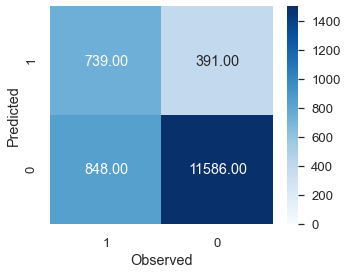

In [111]:
model = grid_clf_acc
y_predict = model.predict(X_test)

accuracy_training = model.score(X_train,y_train)
accuracy_testing = model.score(X_test, y_test)
score_recall = recall_score(y_test,y_predict)
score_precision = precision_score(y_test,y_predict)
score_f1 = f1_score(y_test,y_predict)
score_ROCAUC = roc_auc_score(y_test,y_predict)

print("Trainig accuracy", accuracy_training)  
print("Testing accuracy", accuracy_testing)
print()
print("Recall:", score_recall)
print("Precision:", score_precision)
print()
print("F1 Score:", score_f1)
print("Roc Auc Score:", score_ROCAUC)
print()
print('Confusion Matrix')
draw_cm(y_test,y_predict)

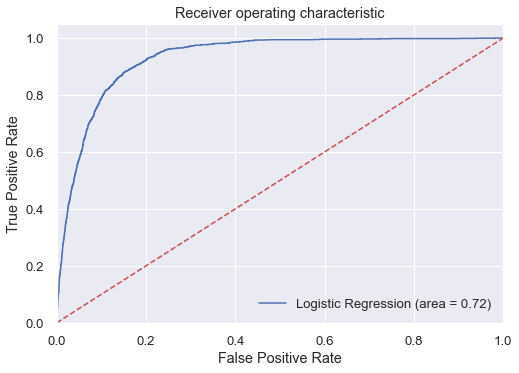

In [112]:
roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
# If i have a  model where we always predict positive reults - 100% TPR, 100% FPR 
# If we always predict 0-> 0% TPR , 0% FPR; BEST MODEL 100% TPR, 0% FPR, - better we have , better the model.

In [113]:
tempResultsDf = pd.DataFrame({'Method':[model_name],
                          'Training accuracy': [accuracy_training],
                          'Testing accuracy': [accuracy_testing],
                          'Recall': [score_recall],
                          'Precision': [score_precision],
                          'F1': [score_f1],
                          'ROC AUC': [score_ROCAUC],
                         })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Training accuracy', 'Testing accuracy', 'Recall', 'Precision', 'F1', 'ROC AUC']]
resultsDf

,Method,Training accuracy,Testing accuracy,Recall,Precision,F1,ROC AUC
0,Logistic Regression,0.902961,0.900029,0.899811,0.345763,0.499563,0.837106
0,Logistic Regression (Preprocessing Scale),0.903150,0.900398,0.873976,0.365288,0.515230,0.836379
0,Decision Tree (Gini),0.905425,0.901725,0.375551,0.635394,0.472079,0.673498
0,Decision Tree (Gini) (GridSearch),0.910386,0.901725,0.427851,0.615036,0.504645,0.696183
0,Bagging (Bootstrap aggregating),0.992922,0.905116,0.451796,0.632275,0.527012,0.708490
0,Bagging (Bootstrap aggregating) (Grid Search),0.969729,0.905854,0.456207,0.636204,0.531376,0.710820
0,Boosting (Ada Boost)(Grid Search),0.900938,0.900693,0.342785,0.641509,0.446817,0.658702
0,Boosting (Gradient Boost)(Grid Search),0.927197,0.908655,0.465658,0.653982,0.543982,0.716506


##### <i>[Insights]
##### <i>Comparing Bagging, Ada Boosting, and Gradient Boosing, Gradient Boosting got highest performance in all four metrics (Recall, Precision, F1, and ROC AUC).

### Random Forest (Grid Search)

In [114]:
model_name = 'Random Forest (Grid Search)'

features = [col for col in df.columns if col != 'Target']

X = df[features]
y = df['Target']

# Because y variable (Target) is imbalanced (No=88%, Yes=12%), use "stratify=y" to have a better split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=.3, 
                                                    random_state=1,
                                                    stratify=y)

X_train.shape, X_test.shape

((31647, 42), (13564, 42))

In [115]:
randomForestCl = RandomForestClassifier(n_estimators = 110,oob_score=True,random_state=1)
randomForestCl = randomForestCl.fit(X_train, y_train)

In [116]:
# Grid Search (This code takes a while to ran)
grid_values = {'n_estimators' : np.arange(270, 310, 10),
               'oob_score' : [True],
               'random_state' : [1]
              }
#
# [Result from the code above]
# Best Parameters : {'n_estimators': 270, 
#                    'oob_score': True, 
#                    'random_state': 1}
#
# This is based on the best parameter from the GridSearch ran previously
# grid_values = {'n_estimators' : np.arange(270, 280, 10),
#                'oob_score' : [True],
#                'random_state' : [1]
#               }

grid_clf_acc = GridSearchCV(randomForestCl, param_grid = grid_values)
grid_clf_acc.fit(X_train, y_train)

#Predict values based on new parameters
y_pred_acc = grid_clf_acc.predict(X_test)
# New Model Evaluation metrics 
print('Evaluation Score : ' + str(grid_clf_acc.score(X_test,y_test)))
print('Best Parameters : ' + str(grid_clf_acc.best_params_))

Evaluation Score : 0.9049690356826895
Best Parameters : {'n_estimators': 300, 'oob_score': True, 'random_state': 1}


Trainig accuracy 1.0
Testing accuracy 0.9049690356826895

Recall: 0.38248267170762446
Precision: 0.6626637554585153

F1 Score: 0.485017978425889
Roc Auc Score: 0.6783416113819077

Confusion Matrix


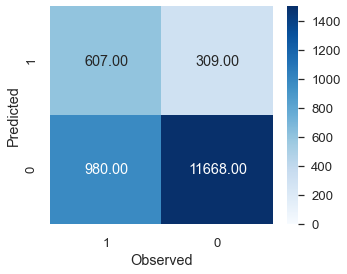

In [117]:
model = grid_clf_acc
y_predict = model.predict(X_test)

accuracy_training = model.score(X_train,y_train)
accuracy_testing = model.score(X_test, y_test)
score_recall = recall_score(y_test,y_predict)
score_precision = precision_score(y_test,y_predict)
score_f1 = f1_score(y_test,y_predict)
score_ROCAUC = roc_auc_score(y_test,y_predict)

print("Trainig accuracy", accuracy_training)  
print("Testing accuracy", accuracy_testing)
print()
print("Recall:", score_recall)
print("Precision:", score_precision)
print()
print("F1 Score:", score_f1)
print("Roc Auc Score:", score_ROCAUC)
print()
print('Confusion Matrix')
draw_cm(y_test,y_predict)

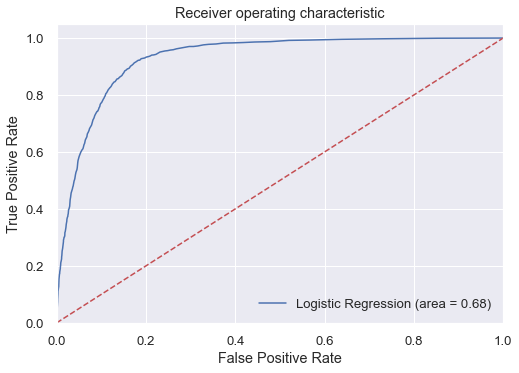

In [118]:
roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
# If i have a  model where we always predict positive reults - 100% TPR, 100% FPR 
# If we always predict 0-> 0% TPR , 0% FPR; BEST MODEL 100% TPR, 0% FPR, - better we have , better the model.

In [119]:
tempResultsDf = pd.DataFrame({'Method':[model_name],
                          'Training accuracy': [accuracy_training],
                          'Testing accuracy': [accuracy_testing],
                          'Recall': [score_recall],
                          'Precision': [score_precision],
                          'F1': [score_f1],
                          'ROC AUC': [score_ROCAUC],
                         })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Training accuracy', 'Testing accuracy', 'Recall', 'Precision', 'F1', 'ROC AUC']]
print()
print("[Summary]")
resultsDf


[Summary]


,Method,Training accuracy,Testing accuracy,Recall,Precision,F1,ROC AUC
0,Logistic Regression,0.902961,0.900029,0.899811,0.345763,0.499563,0.837106
0,Logistic Regression (Preprocessing Scale),0.903150,0.900398,0.873976,0.365288,0.515230,0.836379
0,Decision Tree (Gini),0.905425,0.901725,0.375551,0.635394,0.472079,0.673498
0,Decision Tree (Gini) (GridSearch),0.910386,0.901725,0.427851,0.615036,0.504645,0.696183
0,Bagging (Bootstrap aggregating),0.992922,0.905116,0.451796,0.632275,0.527012,0.708490
0,Bagging (Bootstrap aggregating) (Grid Search),0.969729,0.905854,0.456207,0.636204,0.531376,0.710820
0,Boosting (Ada Boost)(Grid Search),0.900938,0.900693,0.342785,0.641509,0.446817,0.658702
0,Boosting (Gradient Boost)(Grid Search),0.927197,0.908655,0.465658,0.653982,0.543982,0.716506
0,Random Forest (Grid Search),1.000000,0.904969,0.382483,0.662664,0.485018,0.678342


In [120]:
print("[Average]")
pd.DataFrame(resultsDf.mean(axis=0))

[Average]


,0
Training accuracy,0.934745
Testing accuracy,0.903241
Recall,0.519569
Precision,0.576457
F1,0.502858
ROC AUC,0.724003


##### <i> [Insights]
##### <i> Preprocessing Scase improved the F1 Score of Logistic Regression.
##### <i> In Decision Tree and Bagging, I tried Grid Search and it helped making the F1 Score higher; therefore, I used Grid Search for other models as well.
##### <i> 
##### <i> From Testing Accuracy perspective, Gradient Boosting got the highest performance.   
##### <i> From Recall perspective, Logistic Regression got the highest performance.
##### <i> From Precision perspective, Random Forest got the highest performance.
##### <i> From F1 perspective, Gradient Boosting got the highest performance.
##### <i> From ROC AUC perspective, Logistic Regression got the highest performance.
#####    
##### <i> Because of the business goal, I would like to focus on balanced metric to determine the best model which will balance the cost of marketing and opportunity cost; therefore, we will mainly focus on F1 Score.


# Conclusion

#### Comparing several models, based on the F1 Score perspective, Gradient Boosting (with Grid Search) got the highest score. Therefore, I'll propose to use the Gradient Boosting model for this analysis.